# Starter point for the Machine Learning element of the coursework

This part of the coursework uses the same dataset as used in the first part of the coursework. In this part of the coursework you are going to develop three machine learning models for predicting the **'median_house_value'** from the dataset. The focus here is on comparing the different models and looking at how you can improve them. You do not need to use a cleaned up version of the data (i.e. perform outlier removal in advance) but you may if you wish although please comment on this.

Everything needed to complete this assignment should be available in the course slides, but external information from the interenet may prove useful and is encouraged. Please provide citations for resources used in the course. 

### Load libraries and read in data

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

### (Optional) Preprocessing and Data Exploration
What data exploration would you perform to get a sense of the data, and what preprocessing outside of feature normalasation would you perform? This section is an optional place for students to do additional work on the data before progressing into the assignment proper.

In [6]:
median_house_value_corr = houses.corrwith(houses['median_house_value'])

print("Correlations to Median House Value:")
print(median_house_value_corr)

Correlations to Median House Value:
median_house_value    1.000000
median_income         0.688075
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.050594
population           -0.024650
households            0.065843
latitude             -0.144160
longitude            -0.045967
dtype: float64


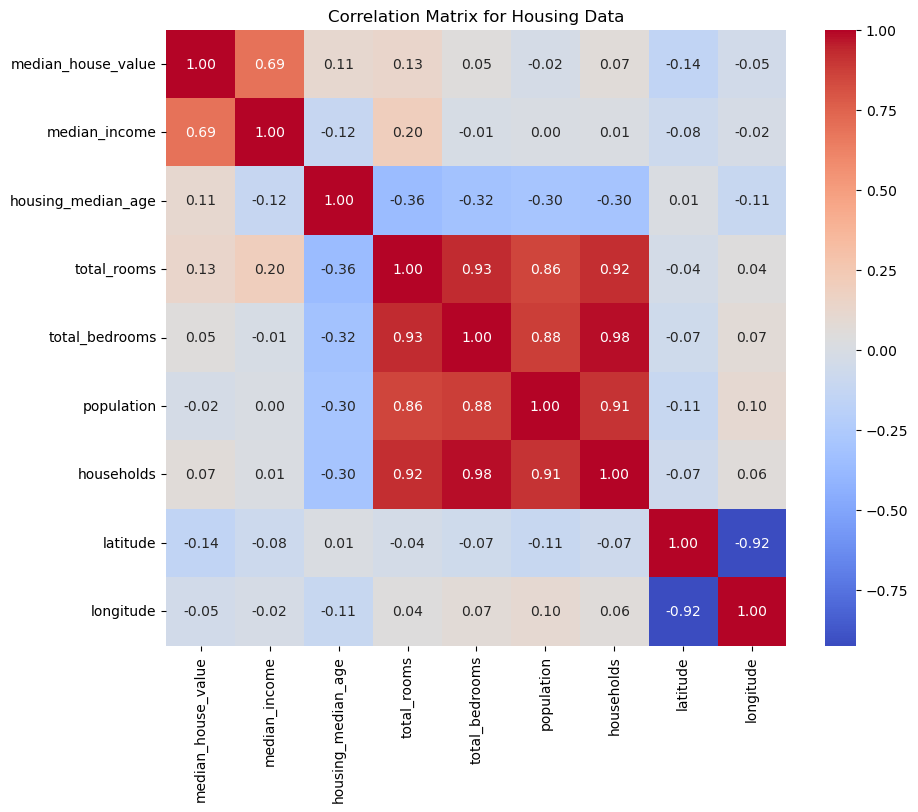

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# https://seaborn.pydata.org/generated/seaborn.heatmap.html

# heat map
corr_matrix = houses.corr()
plt.figure(figsize=(10, 8))  
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix for Housing Data')
plt.show()

## Data Preparation
In this section you will perform feature selection, feature normalisation, and provide a rationale for your actions. 

### Feature Selection
Think about which features may be useful in predicting **'median_house_value'**, are all features in the provided data set useful? Is a subset all that's needed? What techniques can you utilise to make this determination?

In [8]:
selected_features = ['median_house_value', 'latitude', 'longitude', 'median_income', 'population']

### Feature Normalisation
Think about what normalisation/standardisation methods you should apply to the dataset given what you understand about the raw data.

In [9]:
df_selected = houses[selected_features]

# initialise scaler
scaler = RobustScaler()

# fit transform
houses_scaled = scaler.fit_transform(df_selected)
houses_scaled_df = pd.DataFrame(data=houses_scaled, columns=df_selected.columns)

# output
houses
houses_scaled_df

,median_house_value,latitude,longitude,median_income,population
0,1.880448,0.957672,-0.986807,2.197582,-0.899787
1,1.232041,0.952381,-0.984169,2.186664,1.316631
2,1.187941,0.949735,-0.989446,1.707732,-0.714286
3,1.113523,0.949735,-0.992084,0.967177,-0.648188
4,1.119724,0.949735,-0.992084,0.142854,-0.640725
...,...,...,...,...,...
20635,-0.700086,1.380952,-0.686016,-0.905796,-0.342217
20636,-0.706977,1.383598,-0.717678,-0.448655,-0.863539
20637,-0.602239,1.367725,-0.720317,-0.841709,-0.169510
20638,-0.654608,1.367725,-0.746702,-0.765007,-0.453092


### Rationale
Provide your rationale for both Feature Selection and Feature Normalisation here.

## Feature Selection:

- I chose: latitude, longitude, median_income, opulation as features to help predict median_house_value.

- The geographical location, i.e. latitude and longitude, of a property is a primary facotr in real estate valuation. As shown by an article from Richr [1] where it explains the location of a property is one of the most important factors determining its value, impacting things like price and quality of life for residents.

- Median income is considered a strong indicator of economic status in an area. Higer median income usually correlates with more expensive housing markets as people can afford more expensive homes and also median_income has a strong linear correaltion with median_house_value (0.69).

- Population size can show the level of demand for housing in an area. High popualtion areas usually have higher demand for housing, increasing price. As freddie mac suggests in this article, population being a primary driver of housing demand in the United States. [2]


## Feature Normalisation:

- 'The Robust Scaler [3] removes the median from each feature and then scales the data according to the Interquartile Range (IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th percentile) and the 3rd quartile (75th percentile).' [4]
- 'This scaling method is useful for datasets w/ outliers since it lowers their impact on the scaling of the data.' [4]
- Used a robust scaling becasue the dataset has a lot of outliers which uses median and IQR which makes it resistant to outliers. When training the model the outliers don't impact the model.


## Train, Validate, Test Split
In this section you will perform a train, validate, test split utilisation the knowledge learned in class and provide a rationale for your actions. 

### Perform Data Split
Utilise the information from class or online to split your data into train, validate, and test partitions. 

In [10]:
X = houses_scaled_df.drop('median_house_value', axis =1)
y = houses_scaled_df['median_house_value']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# print size
print("Train set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Test set size:", len(X_test))

Train set size: 14448
Validation set size: 3096
Test set size: 3096


### Rationale
Rationale for how you made your train, test, split decision. 

- The 70% training, 15% validation, 15% test data split is used as it provides a good balanced approach.
- The 70% training data split ensures the model has enough examples to learn from, which is essential to capture the underlying patterns in the data. 
- The 15% validation data, set provides a large amount of data for hyperparameter tuning and model adjustments before final evaluation. 
- The 15% test data, makes sure the model is tested on an unseen dataset, which is vital for evaluating generalisation.
- By using 15% of the data for validation and testing, the model is constantly checked against data it hasn't seen during training. Aids in highlighting if the model is too closely fitted to the training data (overfitting).
[5]


## Metric Selection
In this section your will make appropriate metric selection for analysing your models and provide a rationale.

### Select Appropriate Metrics
Think about the models you are building, and what the appropriate metrics and scoring should be for those models.

### Rationale
Provide a rationale for your metrics and scoring selection.

Resources: Lecture 1 - Overview, Introduction, & Basics.pdf [6]


Root Mean Squared Error (RMSE):
- The RMSE is a metric used to evaluate the accuracy of predictions, where it measures the average difference between predicted and actual values attributing more importance to larger errors. Essentially its meausures how far off your predictions are without the need of certain conversionos or calcualtions.
- The RMSE is gives more weight to larger errors, as taking the square root of the mean squared error, has the impact of minimising smaller and magnifying larger errors. Therefore, RMSE is better when large errors are unwanted. It's easier to identify larger errors when you give more weight and RMSE highlights the importance of reducing these mistakes, making sure models predictions are as accurate as possible.
- Using RMSE to assess accuracy of my predictions, allows me to measure the average distance between the predicted values and actual values. This distance is conveyed in the same units as the target variable, i.e. if you're predicting house values, the distance will be measured in dollars. Allowing easy comparison of the performance of different models. For example, if you had two models for predicting house values, you can directly compare their RMSE values, to determine which model has a higher accuracy. If the model has a lower RMSE its predictions are closer to actual house values.

Mean Absolute Error (MAE):
- MAE is often used as a metric for assessing the accuracy of predictions by measuring the average size of differences between predicted and actual values, while not taking into consideration whether the errors are positive or negative i.e. both positive and negative errors are treated equally, so a model which consistently overestimates or underestimates the target variable will both be evaluated the same.
- Since MAE doesn't discriminate between positive and negative errors, MAE is more robust and less sensitive to outliers, compared to RMSE, i.e. if a model is consistently making errors in the same diretion i.e. negative errors, it's more likely to be due to an outlier in the data. By not taking the direction of the errors into account, MAE is less sensitive to these outliers.

R-squared (R2):
- R-squared metric, known as R2, useful for determining the predictive capability of the model. 
- It specifically says the proportion of variance in the target variable that predictors can account for. For example, if your model has an R2 of 0.85, it means 85% of the ups and downs in what you're trying to predict is explained by the features you have there, the rest is irrelevant.
- It's not necessailry better to have R2 nearer to 1. occasionaly, models are tuned to finely to the dataset in a manner which does not generalise well to new data (overfitting) therefore high R2 could give false confidence for predicitons. Overall, higher the R2 the better, but just look out for overfitting. 

## Machine Learning Model 1
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 1
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [11]:
from sklearn.linear_model import LinearRegression

# initialise LinearRegression()
M1 = LinearRegression()
M1.fit(X_train, y_train)

LinearRegression()

In [12]:
M1.score(X_test, y_test)

0.6104735962724949

### Use Model 1 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [13]:
# The model M1, takes new unseen data, i.e. test data, and predicts the house value

In [14]:
y1_pred_test = M1.predict(X_test)
y1_pred_val = M1.predict(X_val)

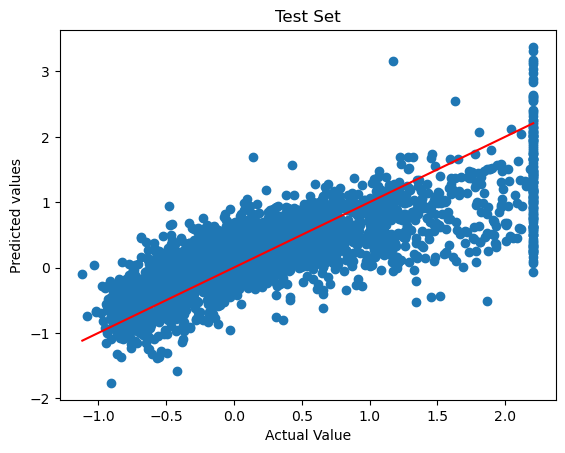

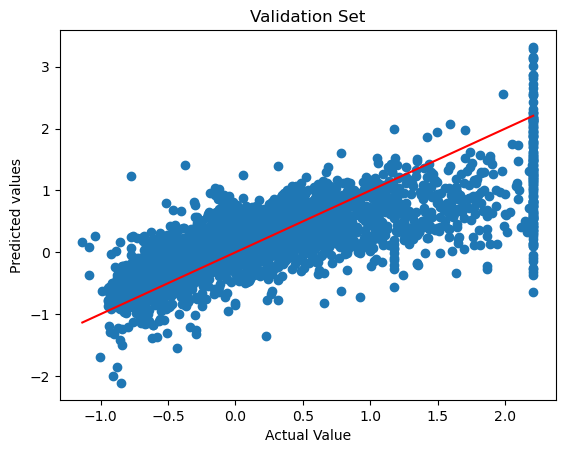

In [15]:
import matplotlib.pyplot as plt

# test set
plt.scatter(y_test, y1_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
plt.title('Test Set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

# validation set
plt.scatter(y_val, y1_pred_val)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
plt.title('Validation Set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

In [16]:
# test set
RMSE = mean_squared_error(y_test, y1_pred_test, squared=False)
print(f"RMSE Value for test set: {RMSE}")
MAE = mean_absolute_error(y_test, y1_pred_test)
print(f"MAE Value for test set: {MAE}")
R2 = r2_score(y_test, y1_pred_test)
print(f"R2 Value for test set: {R2}")

print("\n")

# validation set
RMSE = mean_squared_error(y_val, y1_pred_val, squared=False)
print(f"RMSE Value for validation set: {RMSE}")
MAE = mean_absolute_error(y_val, y1_pred_val)
print(f"MAE Value for validation set: {MAE}")
R2 = r2_score(y_val, y1_pred_val)
print(f"R2 Value for validation set: {R2}")


RMSE Value for test set: 0.4945303252189475
MAE Value for test set: 0.36867700645263135
R2 Value for test set: 0.6104735962724949


RMSE Value for validation set: 0.519974959515869
MAE Value for validation set: 0.3790288100381985
R2 Value for validation set: 0.5628984777642236


### Rationale
Provide a rationale for model

- I didn't do hyperparameter tuning as linear regression doesn't have hyperparameters that can be tuned. [7],[8],[9]

**Linear Regression:**
- The linear regression model is a good start as it's simple, fast to train, and appropriate when we assume that a linear relationship exists between the features and the target variable, i.e. bedrooms, location, etc. and the median house value we're predicting. It doesn't require feature scaling simplifying the preprocessing steps.
- Also, since there's a continuous target variable (median_house_value), linear regression can handle making predictions. 
- I didn't tune any hyperparameters as linear regression doesn't have hyperparameters to tune. 
- It's a good starting point before trying more sophisticated approaches.

[10]

### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

Predictive Ability:

**Test Set**

The test set shows the model is off by about 49,000 (RMSE) on average when trying to predict the final house value. The R-squared shows it can account for around 61% of what drives those house values. Not great, but certainly not bad for the  first model. 

**Validation Set**

When I try the model on the validation set, the accuracy dips a bit. The errors jump to maybe 52,000 (RMSE) average, and the R-squared drops to 56% - so it explains less of the movement in home values. The MAE in the validation set (0.38) is higher than the MAE for the test set(0.37). The fact that the RMSE and MAE is higher for the validation set shows the model might be less consistent when applied to different subsets of the data.

**Graphs**

The scatter plots helps in explaining the results. For mid-range homes, the predictions generally hit close to the actual values. But the higher value places over seem way more varied. The model works fine for normal areas, but really luxury houses cause discrepancies. 

**How well does it generalise?**

Seeing that drop in accuracy between the test and validation sets raises red flags on how well this will hold up across the board. If we were dealing with all regular middle income areas, it should not be a big deal. But with expensive neighborhoods, I'd probably want a model more sophisticated to adapt better.

Linear regression is not a bad starting point but I think it would be good to try non-linear modeling or more advanced techniques to tackle the variation in data. 

## Machine Learning Model 2
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 2
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [17]:
from sklearn.neighbors import KNeighborsRegressor

# initialise KNeighborsRegressor()
M2 = KNeighborsRegressor()
M2.fit(X_train, y_train)

KNeighborsRegressor()

In [18]:
M2.score(X_test, y_test)

0.6453544907624269

In [31]:
from sklearn.model_selection import GridSearchCV
param_dist = {
    'n_neighbors' : [2,3,4,5,6], # https://openclassrooms.com/en/courses/6401081-improve-the-performance-of-a-machine-learning-model/6559796-tune-your-hyperparameters
    'weights': ['uniform', 'distance'] # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

    }


# initialize GriddSearchCV 
grid_search = GridSearchCV(M2, param_dist, cv=5) # 5-fold cross validation
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model_M2 = grid_search.best_estimator_

# compare the performance
print('Score with default hyperparameters: ', M2.score(X_test, y_test))
print('Score with best hyperparameters from GridSearchCV: ', best_model_M2.score(X_test, y_test))

Best Hyperparameters: {'n_neighbors': 6, 'weights': 'distance'}
Score with default hyperparameters:  0.6453544907624269
Score with best hyperparameters from GridSearchCV:  0.6532157056383241


### Use Model 2 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [20]:
y2_pred_test = best_model_M2.predict(X_test)
y2_pred_val = best_model_M2.predict(X_val)

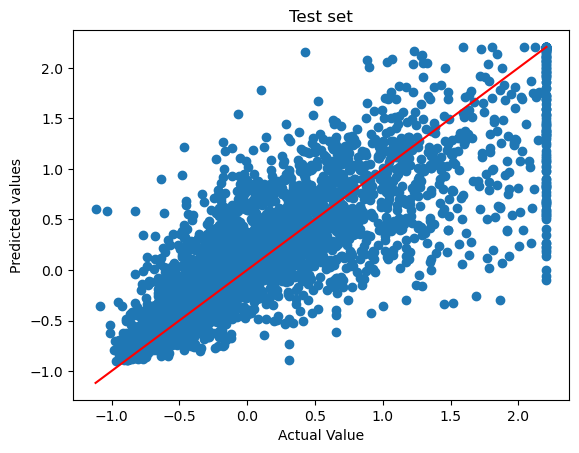

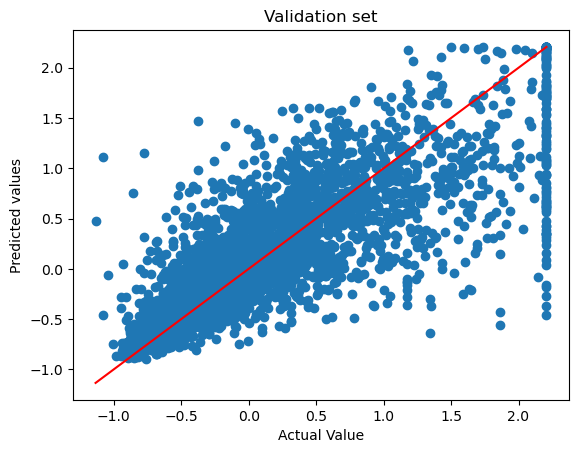

In [21]:
import matplotlib.pyplot as plt

# test set
plt.scatter(y_test, y2_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
plt.title('Test set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

# validation set
plt.scatter(y_val, y2_pred_val)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
plt.title('Validation set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()


In [22]:
# test set
RMSE = mean_squared_error(y_test, y2_pred_test, squared=False)
print(f"RMSE Value for test set: {RMSE}")
MAE = mean_absolute_error(y_test, y2_pred_test)
print(f"MAE Value for test set: {MAE}")
R2 = r2_score(y_test, y2_pred_test)
print(f"R2 Value for test set: {R2}")

print("\n")

# validation set
RMSE = mean_squared_error(y_val, y2_pred_val, squared=False)
print(f"RMSE Value for validation set: {RMSE}")
MAE = mean_absolute_error(y_val, y2_pred_val)
print(f"MAE Value for validation set: {MAE}")
R2 = r2_score(y_val, y2_pred_val)
print(f"R2 Value for validation set: {R2}")


RMSE Value for test set: 0.4666101565932437
MAE Value for test set: 0.3249650244280986
R2 Value for test set: 0.6532157056383241


RMSE Value for validation set: 0.4839221730263659
MAE Value for validation set: 0.3337951676340676
R2 Value for validation set: 0.6214105541229976


### Rationale
Provide a rationale for model

**Trying K-Nearest Neighbors**:

- For my next model, I tested out KNearestNeighbors model [14]. The model looks at the input features of a house (i.e. number of rooms, location etc) we want to price and finds the most similar homes in the data, and averages their values. 

- I did some hyper parameter tuning to optimise the algorithm - how many of the nearest neighbors it checks and how it weights their values. Then compared its predictions to the actual sales numbers.  

- For hyperparameter tuning I used the GridSearchCV.


*Why I used GridSearchCV?*

I decided to use grid search for tuning the KNN model because it lets me check multiple combinations to find the best settings. Grid search checks every specified option in a very structured way so I don't have to manually. This makes experiments alot simpler as all I have to do is setup param grid and initialise gridsearch and wait until it outputs the best hyperparameters to use. And the cross-validation built into it means each model variant gets tested on multiple holdout data, so we can trust the results.

The grid search picked n_neighbors and distance weighting which boosted the R-squared score, a better model than the default. These parameter choices seem reliable due to grid searches ogranised approach. The automation of hyperparameter selection and improvement in accuracy reasssure grid search as an great tuning technique. [11], [12]


*The GridSearchCV process and results:*
- I defined a parameter grid to tune n_neighbors from the range 2-6, and tried both 'uniform' and 'distance' for weights.
- I used 5-fold cross-validation when assessing each parameter combination.
- I printed out the best parameters identified - which were n_neighbors=6 and weights='distance' in this case
- Results before hyperparameter tuning:  0.6453544907624269
- Results after hyperparameter tuning:  0.653215705638324
- The R-squared score on the test set improved from 0.645 to 0.653. 
- Therefore the hyperparameter tuning improved the model, and I used these optimal hyperparameters for the actual model to improve its predictive ability.

[13], [15]

**Why this model?**

KNN can handle cases where the relationships between location, population, etc. and house value follow nonlinear patterns. Since KNN doesn't make assumptions about the relationships between features or spead of the data, it allows KNN to be able to figure out nonlinear and complex relationships.

And by averaging multiple near matches, it's less affected by outliers as they contirbute less to the overall average. Making KNN more robust to outliers.


### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

**Test Set**

On the test set, Model 2 shows the predictions are off by about 32,000 (MAE) or 47,000 (RMSE) dollars of the actual house value - not great, but not super far off either. The R-squared value of 65% shows its learning good relationships about the data and what impacts houses values based on the inputs.

**Validation Set**

On the validation set, accuracy takes a bit of a dip, with larger errors up to maybe 48,000 (RMSE) dollars average now. And the R-squared drops a bit aswell, meaning it captures less of the variance. Which means it has very bad generalisability.

**Graphs** 

The graphs help explain why the results are the way they are. For mid-range homes, the predictions tend to hit pretty close to their real values. As prices get towards the higher end though, there still is variance and the data is more widespread between the predicted and actual values. Again this model is similar to model 1 as it can handle ordinary homes better than luxury homes.

**How well does it generalise?**

Its a good sign that the performance metrics remain quite similar on both test and validation sets as it shows Model 2 doesn't just memorise the data. But the predictions haven't necessarily improved that much from model 1 as when it comes to expensive homes as there's still issues in the predictions and inaccuracies, particulary for expensive homes, which could be an issue if this is applied to the California housing market. Overall, the KNN shows potential, but isn't outperforming linear regression. 

## Machine Learning Model 3
In this section your will select an appropriate machine learning model for predicting **'median_house_value'**, apply it to the dataset to perform this prediction on the test set created in the Train, Validate, Test Split section, and comment on the predictive ability of the model you selected. 

### Select and Build a Machine Learning Model 3
Think about the task at hand, and select an appropriate model to build on the train and validate data. Try different sets of hyper-parameters to improve your model.

In [23]:
from sklearn.ensemble import RandomForestRegressor

M3 = RandomForestRegressor()

M3.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
M3.score(X_test, y_test)

0.8390990881505584

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

# random parameter grid 
param_grid = {
    'n_estimators': [100, 200, 300, 1000], # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    'max_depth': [80, 90, 100, 110], # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
    'min_samples_split': [8, 10, 12] # https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
}

rand_forest = RandomForestRegressor()

# initialize GriddSearchCV with RandomForestRegressor
grid_search = GridSearchCV(rand_forest, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# get the best hyperparameters and model
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_model_M3 = grid_search.best_estimator_

# compare the performance
print('Score with default hyperparameters: ', rand_forest.fit(X_train, y_train).score(X_test, y_test))
print('Score with best hyperparameters from GridSearchCV: ', best_model_M3.score(X_test, y_test))


Best Hyperparameters: {'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 1000}
Score with default hyperparameters:  0.8370370910951379
Score with best hyperparameters from GridSearchCV:  0.8387625279147574


**Results:**

Grid Search: 

- Best Hyperparameters: {'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 1000}
- Score with default hyperparameters:  0.8370370910951379
- Score with best hyperparameters from GridSearchCV:  0.8387625279147574

Note:

- Ran machine learning model 3 on a different laptop as mine was extremely slow, so I've added the results I got from there. 
- Furthermore, I didn't set a random state for the random forrest regressor, therefore the values maybe different when they are run but after running it a couple times the values always improved and stayed within the 0.83 range.

### Use Model 3 to Predict on Test Data
Use the model you've trained to predict **'median_house_value'** on the test data.

In [26]:
y3_pred_test = best_model_M3.predict(X_test)
y3_pred_val = best_model_M3.predict(X_val)

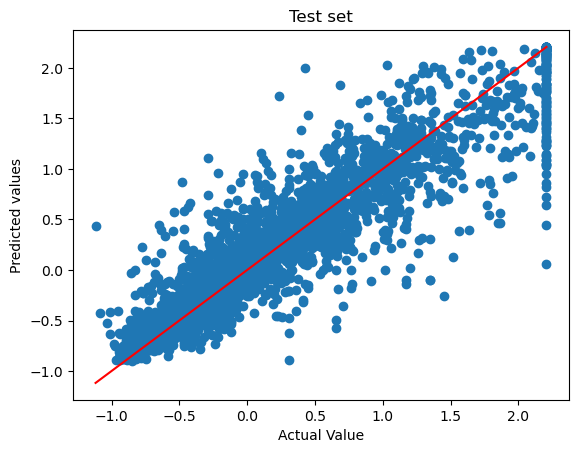

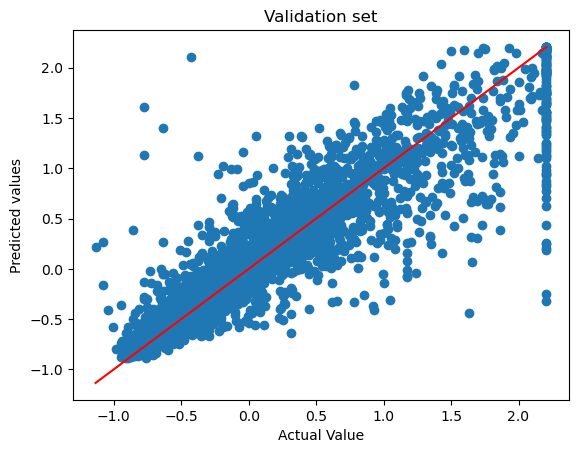

In [29]:
# test set
plt.scatter(y_test, y3_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='-', color='red')
plt.title('Test set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

# validation set 
plt.scatter(y_val, y3_pred_val)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], linestyle='-', color='red')
plt.title('Validation set')
plt.xlabel('Actual Value')
plt.ylabel('Predicted values')
plt.show()

In [28]:
# test set
RMSE = mean_squared_error(y_test, y3_pred_test, squared=False)
print(f"RMSE Value for test set: {RMSE}")
MAE = mean_absolute_error(y_test, y3_pred_test)
print(f"MAE Value for test set: {MAE}")
R2 = r2_score(y_test, y3_pred_test)
print(f"R2 Value for test set: {R2}")

print("\n")

# validation set
RMSE = mean_squared_error(y_val, y3_pred_val, squared=False)
print(f"RMSE Value for validation set: {RMSE}")
MAE = mean_absolute_error(y_val, y3_pred_val)
print(f"MAE Value for validation set: {MAE}")
R2 = r2_score(y_val, y3_pred_val)
print(f"R2 Value for validation set: {R2}")


RMSE Value for test set: 0.31816871053952145
MAE Value for test set: 0.2105316664996766
R2 Value for test set: 0.8387625279147574


RMSE Value for validation set: 0.3423956399682693
MAE Value for validation set: 0.2179920131278573
R2 Value for validation set: 0.8104717681691571


**Results:**

- RMSE Value for test set: 0.31816871053952145
- MAE Value for test set: 0.2105316664996766
- R2 Value for test set: 0.8387625279147574


- RMSE Value for validation set: 0.3423956399682693
- MAE Value for validation set: 0.2179920131278573
- R2 Value for validation set: 0.8104717681691571

Note:

Ran machine learning model 3 on a different laptop as mine was extremely slow, so I've added the results I got from there.

### Rationale
Provide a rationale for model

Why I chose Random Forest?

I decided to choose the random forest model because it can handle data with intricate relationships between the different features, i.e. location, size, no. of rooms etc, that are factors in determining house values. The ensemble method also avoids overfitting better than other sophisticated approaches.

The parameters [16] of the model (i.e. 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 1000)shows the model is tuned to explore patterns well without losing relevance by being overly specific and focused. There's flexibility to capture interactions, and enough restriction through the sample splits to ensure accuracy on new data, making the model robust.


### Comment on Predictive Ability
Think about the metrics and scoring received from the training and testing components. Think about the generalisability and quality of your results. 

**Test Set**

- On the test set, the errors are small, with it being off by 32,000 (0.318 RMSE) to 21,000 dollars (0.210 MAE) on average from target value, and it explains almost 84% of price changes based on inputs. 
- Which is much better than the other models. 

**Validation Set**

- On the validation set, scores drop by a little for the R-squared but there is an increase in the errors i.e. RMSE and MAE. 
- As shown above the errors are 34,000 (0.342 RMSE) and 22,000 (0.217 MAE) and 81% R-squared. 
- Not that much  difference which indicates that the tuned model generalises quite well and the quality of the results is sufficient.

**Graphs** 

- The scatter plots show the similar results as before as the higher value homes seem to have alot more variance. The model works fine for middle-income homes, but really expensive houses cause issues. 
- After having done this with two other less complex models it seems like the varibaility in the data of expensive houses causes issues, but it could be the case that a more complex model is required to find the relationships. 
- But in general this scatter plot points are densely packed around the red line, showing the models accuracy is good.

**How well does it generalise?**

- Looking at all the results above it seems like this model has very consistent results in the scatter plot for both the test and validation set suggesting the model is generalisable. 

Summary:

- In summary, since the results show consistency throughout, I'm assured this tuned random forest can reliably predict outcomes and model the housing market. 
- From the validation results it shows when the model is shown new unseen data it seems to maintain high accuracy. Therefore this method seems to have very good performance on average. 
- The only issue is the computational power required to run it as it took me roughly half an hour to run.

## Comparison Between Models
In this section you will comment on the difference in predictive ability between models, the difference in analysis metrics between models, and the pros/cons of each model as you understand it.

### Difference in Predictive Ability
Think about what you understand if the predictive ability from each model based on scores gained, comment on the difference between each model and suggest why you believe this to be the case. Additionally comment on the difference in hyper-parameter selection between your models.

**Model 1: Linear Regression**

The R-squared value of the linear regression model shows it was able to account for about 61% of what drives the home values based on the inputs given. Which is alright as it tells me there's probably some straightforward relationships in the data that the model captures. But since over a third of the variance remains unexplained, the model is probably not finding the complex relationships in the data, meaning we need to use more sophisticated apporaches to help capture these relationships. Also, since this model got the lowest R-squared score it seems to have the worst generalisability. But due to the consistent RMSE and MAE value for both the test and validation set it suggests the models quality is fine, it just isn't performing as well as the other models.


**Model 2: K-Nearest Neighbors** 

For the KNN model there was a slight improvement in comparision to the linear regression model, as shown from the R-squared value, it explains 65% of the house value changes. Suggesting that it handles nonlinear relationships in a way the linear model doesn't by directly looking at similar home values rather than making assumptions that homes follow a linear pattern. This model got a better R-squared score than model 1 so it looks like it has better generalisability than model 1, the reason it didn't perform the best could be because it tends to be more sensitive to certain features and high dimensionality causing the performance to dip. This model also has a pretty consistent RMSE and MAE value for both the test and validation set suggesting the models quality is good.

When I talk about dimensionality [17], [18], [19] I mean more dimensions mean exponentially more hypothetical houses, making real data points sparse. The sparsity means the nearest neighbors might not be that close to the target, reducing performance. Too many features makes neighbors lose their integrity. Making predictions not as good as it could be.


**Model 3: Random Forest**

The random forest model really stands out, as it was able to account for over 83% of the variance in home values. Which is much better than the other two model. This indicates that home valuations are complex and the relationships are not really straightforward between location, size,  no. of rooms, etc. But the ensemble of decision trees [20] in Random Forest manage to model those complexities much better than the simpler approaches. Model 3 got the highest R-squared score indicating the best fit and generalisability. Also it has the lowest RMSE and MAE showing the results are good quality, but theres a slight decrease in the R-squared score from the test set to the validation set implying theres some overfitting which is usual for complex models like this one.

[21], [22]

**Hyper-parameter Comparison**

For model 1, I didn't use hyperparameters as linear regression doesn't have any. So this comparison will only talk about model 2 and model 3.

- I used Grid Search CV for both model 2 and 3.

- For the KNN model, I optimised the number of neighbors and how it weights their values. What worked best was checking 6 neighbors with distance-based weighting got the best result. 

- For the random forest model, I found that a larger number of shallow trees was better than a few deep ones. This allowed the model to capture interactions. Allowing it to learn about the intricate relationships in the data and potentially preventing overfiting.

- After tuning, both models improved slightly. The KNN model was related to the data structure whereas the random forest utilise decision tree's complexity. The random forest has the ability to model patterns without being impacted by anomalies.

- Since the housing data need is quite complex it requires some sophistication, which tuning allowed for. Tuning allowed the ability to specify so the algorithms could see the nuances.

### Difference in Analysis Metrics
Think about the analysis metrics you received from each model, comment on the use in the difference of these metrics and suggesting which model is "better" or "worse" when comparing them.

**Analysis Metrics**

The metrics I used were R-squared, RMSE, and MAE because they provided a broad set of indicators that can be used to see the models performance.

R-squared tells me how much pricing variability the model explains based on home value. Crucial to know if it's actually picking up signals or guessing blindly.

Root Mean Square Error (RMSE)  helps me have a set standard to check error consistency. Two models could have the same average mistake, but RMSE shows which model's guesses have more deviation.

And Mean Absolute Error (MAE) shows the average error to make model comparisons simple. Using this alongside  RMSE, providess a holistic view on models accuracy.

The graphs helped shows which regions in the data caused issues i.e. expensive households. The metrics quantify accuracy, but I wanted a visual representation aswell to help see missing trends in data that the quantitative data couldn't see.

**RMSE & MAE**

The RMSE values shows that model 3 made the most accurate predictions overall, since it has the lowest RMSE. Model 1 had the wide distribution and largest errors overall when trying to guess house value.

The MAE reinforces this result from the RMSE as the random forest was generally most accurate, while the linear model was the least.

**R-squared**

The R-squared shows what percentage of the market alters each model captured based on features i.e. income, location etc. Again model 3 was the best with an R-squared of 83%. 

**Summary**

Evidently, model 3 made the most accurate predictions. However this was a very computationally expensive procedure. But regardless of that fact it was alot better than the other models considering all the metrics. If accuracy is your main concern then go for model 3. But if speedy predictions is what you need then go for model 2 as it too the same time to run as model 1 but the predictions were better.


### Pros/Cons
Think about the models and analysis metrics you've gathered, and suggest the positives and negatives of each model.

**Model 1: Linear Regression**

For model 1, the linear regression model is simple, quick and easy to interpret. I can clearly see how each feature impacts the prediction. But due to its lack of complexity it has the worst scores. As it's not able to effectively capture certain relationships between features as more complex models are able to i.e. Random Forest. 

**Model 2: KNN** 

For model 2, KNN makes no assumptions about the form of the data, allowing it to be able to better deal with and model nonlinear relationships in a way linear regression is unable to. Since this is quite a large dataset (with rougly 20,640 data points) it is somewhat more compuationally expensive to run the KNN as it has more complexity involved in comparison to model 1, and also high dimensionality (as talked about previously in the 'Difference in Predictive Ability' section).

**Model 3: Random Forest**

For model 3, the random forest has the best performance as it can handle complex realtionships, is less likely to overfit, and has the highest R-squared score meaning it explains the distribution of data the most . But to train the trees it took me roughly 30 minutes to run, which is alot more time in comparison to my other models, shwoing its alot more computationaly expensive. And it's more difficult to interpret as it's harder to understand why it specific predictions are obscured by the model.

## Conclusion
In this section you will draw conclusions about the models you've selected, and efficacy of different analysis metrics you've used, and any additional comments or concerns about the models or metrics you've observed. 

### Model Selection
Think about all of the information you've learned both theoretically from the slides and practically through completing this assingment about the models you've selected. What conclusions can you draw about the models, and what situations would you pick one model over another?

- If I'm dealing with linear relationships in the data between features, the linear model is a good model as it's easy to understand and quick to run. 

- Use model 2 if there's some non-linear patterns without high dimensionality since K-nearest neighbors can deal with  that without having large dip in performance. This is a good middle ground between accuracy and efficiency.

- If I want to have the highest level of accuracy, which is going to be likely when proedicitng house values, that's when I use the random forest in model 3. Eventhough it's computationally expensive,the ensemble approach unravels even the complicated interactions between features.

- Depending on you're objective is, i.e. efficiency or accuracy, I think that it must be clear before deciding on what model to pick. In terms of effieciency, eventhough linear regression might be slightly faster, KNN is still fast with better perfomance metrics. In terms of accuracy hands down model 3 wins.  

### Analysis Metrics
Think about the metrics you've selected and what you've learned both thetoretically from the slides and practically through this assignment. What conclusions can you draw about these metrics, and what situations might you pick one set of metrics over another? (Here you may comment on metrics which you have not selected in this assignment)

- I used different performance metrics so I can get a holistic perspective of the models. R-squared shows how much of the movement in home values the model captures based on the input traits i.e, location and income. Which is important to know as it indicates whether the model is actually learning anything of value or just guessing.

- But knowing the errors was more reliable i.e. RMSE and MAE. RMSE gives the average error between actual and predicted value and it gives more weight to larger errors, which is useful to know if there are some anomalies messing with the predictions. The RSME should be used when large errors are especially not wanted. MAE just acts as a good baseline measure for the errors and is therefore more straightforward to interpret. 

- If I were to pick only one of the metrics then it depends on what the intended outcomes are. If I'm presenting the model results to convince my boss that this model is best then R-squared is able to convince you enough about the predictive ability of a model. But if I am using the models to help determine the actual house value the errors are of very big importance. Therefore, in this particualr situation large errors would be a big issue therefore I need to use RMSE as it's more sensitive to bigger errors.

### References 


[1] https://richr.com/blog/the-impact-of-a-homes-location-on-its-value/#:~:text=The%20old%20saying%20%E2%80%9Clocation%2C%20location%2C,the%20people%20who%20live%20there

[2] https://www.freddiemac.com/research/insight/20210128-population-growing

[3] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html

[4] https://proclusacademy.com/blog/robust-scaler-outliers/

[5] https://www.v7labs.com/blog/train-validation-test-set

[6] https://ncl.instructure.com/courses/50010/pages/lecture-1-background?module_item_id=2960569

[7] https://ncl.instructure.com/courses/50010/pages/lecture-2-linear-regression?module_item_id=2960573

[8] https://stackoverflow.com/questions/60454618/is-it-possible-to-tune-the-linear-regression-hyperparameter-in-sklearn

[9] https://www.brodrigues.co/blog/2018-12-02-hyper-parameters/#:~:text=Hyper%2Dparameters%20are%20parameters%20of,ridge%20regression%2C%20lasso%20and%20elasticnet.

[10] https://ncl.instructure.com/courses/50010/pages/practical-6-random-forest-01-slash-11?module_item_id=2960591

[11] https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

[12] https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

[13] https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/

[14] https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

[15] https://www.jeremyjordan.me/hyperparameter-tuning/ 

[16] https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

[17] https://www.linkedin.com/pulse/curse-dimensionality-divya-gera/

[18] https://vtiya.medium.com/the-relationship-between-high-dimensionality-and-overfitting-5bca0967b60f

[19] https://towardsdatascience.com/k-nearest-neighbors-and-the-curse-of-dimensionality-e39d10a6105d

[20] https://ncl.instructure.com/courses/50010/pages/lecture-6-trees-and-random-forest?module_item_id=2960589

[21] https://ncl.instructure.com/courses/50010/pages/practical-6-random-forest-01-slash-11?module_item_id=2960591

[22] https://ncl.instructure.com/courses/50010/pages/lecture-6-trees-and-random-forest?module_item_id=2960589
